# Ensemble methods

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
train = pd.read_csv("imb_train.csv")
test = pd.read_csv("imb_test.csv")
train.head()

,cls,x1,x2
0,0,0.200798,0.678038
1,0,0.016620,1.576558
2,0,0.228725,-0.559534
3,0,0.126379,-0.093814
4,0,0.600821,-0.298395


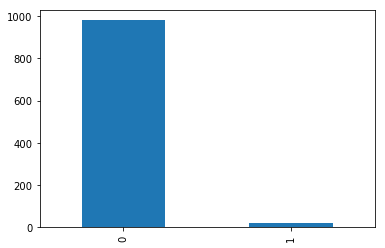

In [6]:
count_classes = pd.value_counts(train['cls'], sort = True).sort_index()
count_classes.plot(kind = 'bar')

In [62]:
features_train=train.ix[:,"x1":"x2"]
labels_train=train["cls"]

features_test=test.ix[:,"x1":"x2"]
labels_test=test["cls"]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  after removing the cwd from sys.path.


### 随机过采样 

In [67]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
os_features,os_labels = ros.fit_sample(features_train,labels_train)

In [68]:
len(os_labels[os_labels==1])

980

### 过采样SMOTE

In [73]:
from imblearn.over_sampling import SMOTE
oversampler=SMOTE(random_state=0)
os_features,os_labels=oversampler.fit_sample(features_train,labels_train)

In [74]:
len(os_labels[os_labels==1])

980

### 综合采样 

In [83]:
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=0)
os_features,os_labels= smote_tomek.fit_sample(features_train,labels_train)

### CART分类树

In [84]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='gini', 
                             max_depth=3, 
                             class_weight=None,
                             random_state=1234)  # 支持计算Entropy和GINI
clf.fit(os_features,os_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1234, splitter='best')

In [85]:
import sklearn.metrics as metrics

print(metrics.classification_report(labels_test,clf.predict(features_test)))

             precision    recall  f1-score   support

          0       0.99      0.99      0.99       245
          1       0.60      0.60      0.60         5

avg / total       0.98      0.98      0.98       250



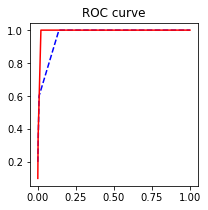

In [86]:
train_est = clf.predict(features_train)  
train_est_p = clf.predict_proba(features_train)[:, 1]  
test_est = clf.predict(features_test)  
test_est_p = clf.predict_proba(features_test)[:, 1]  
fpr_test, tpr_test, th_test = metrics.roc_curve(
    labels_test, test_est_p)

fpr_train, tpr_train, th_train = metrics.roc_curve(
    labels_train, train_est_p)

plt.figure(figsize=[3, 3])
plt.plot(fpr_test, tpr_test, 'b--')
plt.plot(fpr_train, tpr_train, 'r-')
plt.title('ROC curve')
plt.show()

In [87]:
print(metrics.roc_auc_score(labels_test, test_est_p))

0.968979591837
